##### Chap 1.4.10 Histograms in OpenCV

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [50]:
img = cv2.imread('Histogram3.png',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

In [51]:
hist.shape

(256, 1)

In [52]:
print(hist)

[[2.9806e+04]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [1.0000e+00]
 [0.0000e+00]
 [1.0000e+00]
 [2.9415e+04]
 [0.0000e+00]
 [2.0000e+00]
 [3.0000e+00]
 [5.0000e+00]
 [2.0000e+00]
 [3.0000e+00]
 [3.6533e+04]
 [0.0000e+00]
 [2.0000e+00]
 [1.0000e+00]
 [1.0000e+00]
 [3.0000e+00]
 [4.6339e+04]
 [8.0000e+00]
 [1.1550e+03]
 [1.1580e+03]
 [5.0000e+00]
 [3.4583e+04]
 [2.0000e+00]
 [1.0000e+00]
 [0.0000e+00]
 [2.8998e+04]
 [0.0000e+00]
 [0.0000e+00]
 [2.8006e+04]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [2.5241e+04]
 [0.0000e+00]
 [0.0000e+00]
 [2.4605e+04]
 [0.0000e+00]
 [0.0000e+00]
 [2.2135e+04]
 [0.0000e+00]
 [0.0000e+00]
 [2.0860e+04]
 [0.0000e+00]
 [1.9839e+04]
 [0.0000e+00]
 [0.0000e+00]
 [1.8008e+04]
 [0.0000e+00]
 [1.7515e+04]
 [0.0000e+00]
 [1.5931e+04]
 [0.0000e+00]
 [1.5429e+04]
 [0.00

In [53]:
hist,bins = np.histogram(img.ravel(),256,[0,256])

In [54]:
print(hist)

[29806     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     1     0     1 29415     0     2
     3     5     2     3 36533     0     2     1     1     3 46339     8
  1155  1158     5 34583     2     1     0 28998     0     0 28006     0
     0     0 25241     0     0 24605     0     0 22135     0     0 20860
     0 19839     0     0 18008     0 17515     0 15931     0 15429     0
 15224     0 14149     0 13191     1 12592     0 11494     0 11129     0
 10382 10072     0  9612     0  9130  8648     0  8621  8004     0  7882
  7621     1  7422  7075     0  7054  6898  6777     2  6431  6342  6213
     0  6164  6210  6012  5821     0  5751  5528  5583  5318  5043  4977
  5028     1  4927  4981  4543  4633  4394  4418  4305  4370  4258  4251
  4281  4304  4279  4011  4106  4067  3931  4054  3843  3988  3990  3882
  7681  3738  3854  3749  3752  3791  3547  7072  3455  3609  3454  3532
  6804  3320  3279  3233  6488  3315  3228  3265  6

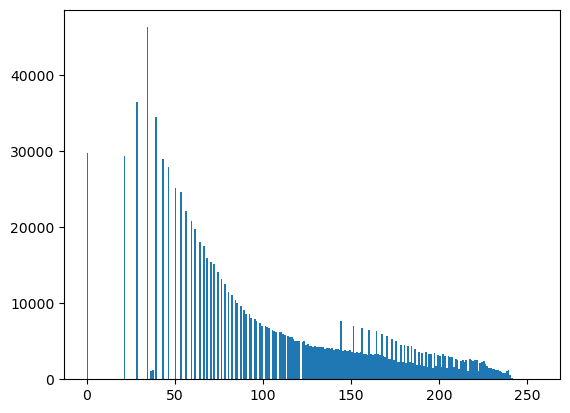

In [55]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

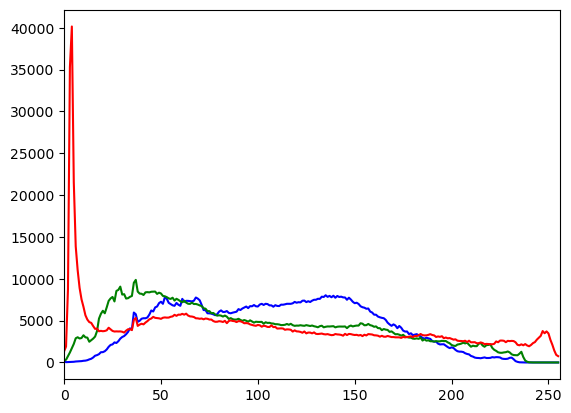

In [56]:
img = cv2.imread('Histogram3.png')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

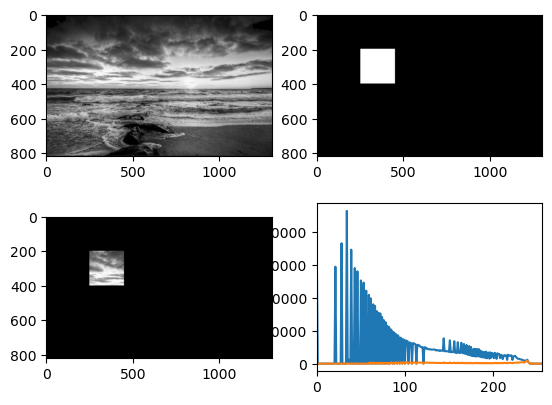

In [57]:
img = cv2.imread('Histogram3.png',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[200:400, 250:450] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

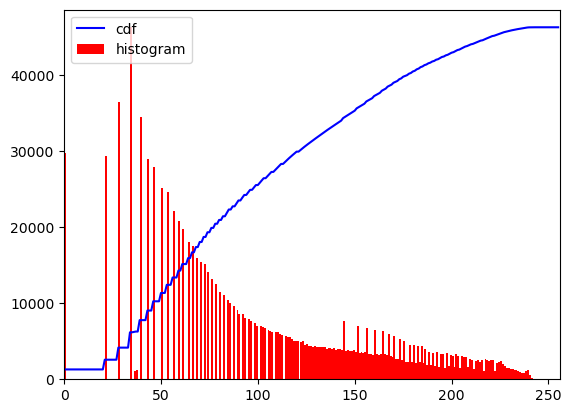

In [58]:
img = cv2.imread('Histogram3.png',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [59]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [60]:
img2 = cdf[img]

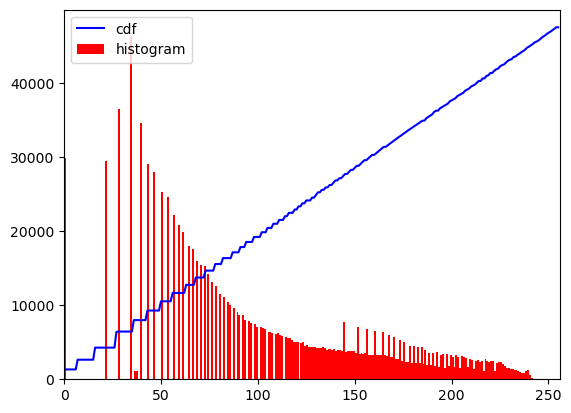

In [68]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

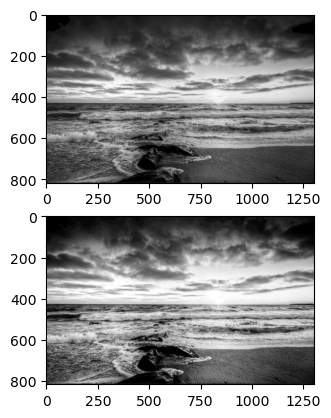

In [71]:
plt.subplot(211), plt.imshow(img, 'gray')
plt.subplot(212), plt.imshow(img2, 'gray')
plt.show()